problem statement:
    
    This is a universal bank data.Check weather a person has a personal loan or not. It is a classification problem

Feature attributes:
ID = unique Id of each customer                     
Age   = Age of the customer                  
Experience = experience of the customer             
Income   = salary of each customer               
ZIP Code  = unique code of customer              
Family    = Type of family              
CCAvg     = average value             
Education = education of the customer             
Mortgage  =  Mortgage            
Personal Loan = Personal Loan          
Securities Account = Securities Account  
CD Account  =CD Account             
Online   = Online          
CreditCard= CreditCard 

## Step-1...Import necessary library 

In [61]:
# Import pandas module
#https://archive.ics.uci.edu/ml/index.php
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step-2... Load the data

In [10]:
bank_DF = pd.read_csv("UniversalBank.csv",  header = "infer") ## read the csv file

In [62]:
print(type(bank_DF)) ## type of data set

<class 'pandas.core.frame.DataFrame'>


# Step-3...Data inspection

In [12]:
bank_DF.head() ## shows top 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
bank_DF.tail() ## shows bottom 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [14]:
bank_DF.tail().T ###  Transpose of bottom  rows

,4995,4996,4997,4998,4999
ID,4996.0,4997.0,4998.0,4999.0,5000.0
Age,29.0,30.0,63.0,65.0,28.0
Experience,3.0,4.0,39.0,40.0,4.0
Income,40.0,15.0,24.0,49.0,83.0
ZIP Code,92697.0,92037.0,93023.0,90034.0,92612.0
Family,1.0,4.0,2.0,3.0,3.0
CCAvg,1.9,0.4,0.3,0.5,0.8
Education,3.0,1.0,3.0,2.0,1.0
Mortgage,0.0,85.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0


In [15]:
print("Rows: {} and Columns: {}".format(bank_DF.shape[0], bank_DF.shape[1]))  ### size of data set

Rows: 5000 and Columns: 14


In [16]:
# Verify columns
bank_DF.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [17]:
### Statistical summary of data and its transpose 
bank_DF.describe().T  

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [18]:
### converting education data type as categorcal
bank_DF['Education'] = bank_DF['Education'].astype('category')

In [19]:
## check for data types
bank_DF.dtypes 


ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [20]:
## information about data set
bank_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


## Step-3....Exploring the data

In [21]:
#bank_DF_Dummy.head(5)
bank_DF_Dummy = pd.get_dummies(bank_DF)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [63]:
#bank_DF.isnull().sum()
## Null values percentage with overall data
bank_DF.isnull().sum().sort_index()/len(bank_DF)
## Replace Null values with the mean
#bank_DF = bank_DF.fillna(bank_DF.mean)

Age                   0.0
CCAvg                 0.0
CD Account            0.0
CreditCard            0.0
Education             0.0
Experience            0.0
Family                0.0
ID                    0.0
Income                0.0
Mortgage              0.0
Online                0.0
Personal Loan         0.0
Securities Account    0.0
ZIP Code              0.0
dtype: float64

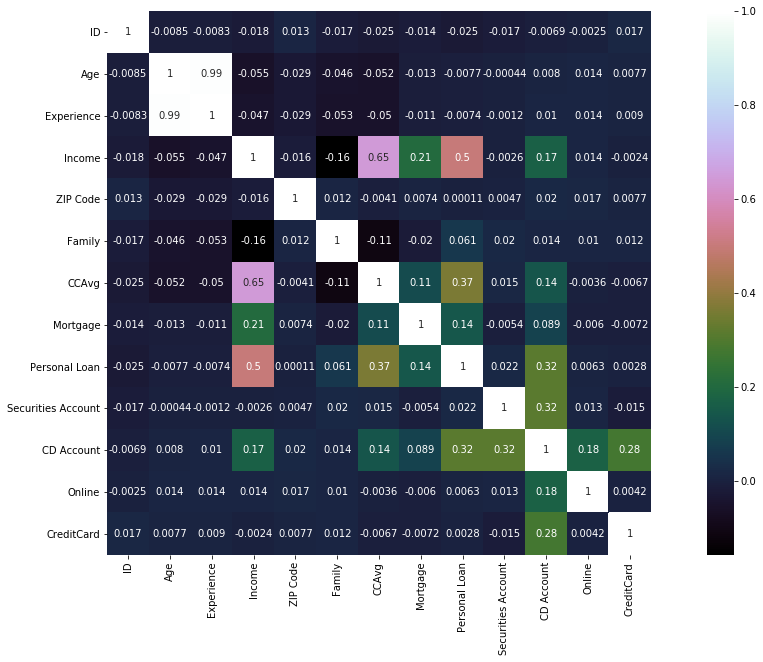

In [24]:

# GETTING Correllation matrix
corr_mat=bank_DF.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [37]:
### Splitting data into x and y 
y = bank_DF_Dummy["Personal Loan"]
x = bank_DF_Dummy.drop(["Personal Loan", "ID", "ZIP Code"], axis=1)

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Education_1           5000 non-null uint8
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: float64(1), int64(9), uint8(3)
memory usage: 405.4 KB


In [39]:
### split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [40]:
print(x_train.shape)
print(y_train.shape)

(4000, 13)
(4000,)


In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Education_1           5000 non-null uint8
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: float64(1), int64(9), uint8(3)
memory usage: 405.4 KB


In [42]:
### Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [44]:

type(x_train)

numpy.ndarray

In [45]:
x_train[:5]

array([[ 0.66709669,  0.60168549, -0.220072  ,  1.41119333,  0.37523378,
        -0.55957126, -0.33702484, -0.25320505,  0.83103374,  1.55807321,
         1.17876472, -0.6139514 , -0.66675695],
       [-0.99354362, -0.88482131, -0.78225239, -1.21103026, -0.35418125,
        -0.55957126,  2.9671403 , -0.25320505,  0.83103374, -0.64181837,
         1.17876472, -0.6139514 , -0.66675695],
       [-0.64393513, -0.70993816, -0.97685329,  1.41119333, -1.00318832,
        -0.55957126, -0.33702484, -0.25320505, -1.20332058,  1.55807321,
         1.17876472, -0.6139514 , -0.66675695],
       [-0.9061415 , -1.05970446, -0.65251845, -0.33695573, -0.15890479,
        -0.55957126,  2.9671403 , -0.25320505, -1.20332058,  1.55807321,
        -0.84834572,  1.62879343, -0.66675695],
       [ 0.84190094,  0.77656864, -0.4146729 , -1.21103026, -1.00318832,
         0.9185101 , -0.33702484, -0.25320505,  0.83103374, -0.64181837,
         1.17876472, -0.6139514 , -0.66675695]])

# Step-4... Build a model

In [46]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:

# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1
)

In [49]:
# Train model
%time Adaboost_model.fit(x_train, y_train)

Wall time: 3.89 s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [50]:

# Predict on Test 
y_preds = Adaboost_model.predict(x_test)

In [52]:

# Verify accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

0.987


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=4)

In [54]:

# Train model
%time Adaboost_model_clf.fit(x_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 17.1 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:

# Find best model
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.98525 {'learning_rate': 0.9, 'n_estimators': 200}


In [58]:

y_pred_test=best_ada_model.predict(x_test)

In [59]:

# Verify accuracy
print(accuracy_score(y_test,y_pred_test))

0.987


In [60]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 100,
    learning_rate = 0.1
)

%time Adaboost_model.fit(x_train, y_train)

# Predict on Test 
y_preds_train = Adaboost_model.predict(x_train)
y_preds_test = Adaboost_model.predict(x_test)

print("Train Accuracy", accuracy_score(y_train, y_preds_train))
print("Test Accuracy", accuracy_score(y_test, y_preds_test))

Wall time: 653 ms
Train Accuracy 0.99225
Test Accuracy 0.979


## Step-5... Conclusion

Adaboost technique is applied on the data set.we got the accuracy score as 0.987.
hyper parameter tunning is used to imporve the perfarmance with best parameters as max_depth=2,n_estimators=100, learning rate=0.1.
By these parameters we got the Train accuracy as 0.99225 and test accuracy as 0.979, from this results we can say this is the good fit model